Fetching data for BLK from 2024-08-07 to 2024-11-10...
Fetching data for BLK from 2024-08-18 to 2024-11-18...
Basic Statistics:
Price         Close
Ticker          BLK
count     64.000000
mean     949.400780
std       56.941500
min      860.969971
25%      888.117477
50%      949.130005
75%      991.554993
max     1053.839966


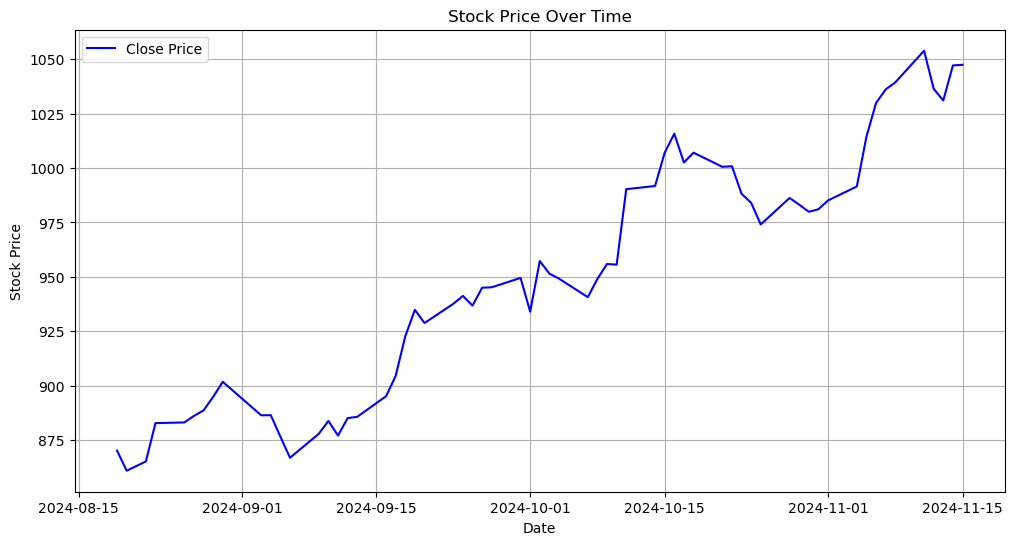

C:\Users\harsh\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)



Training LSTM...
Epoch 1/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 12s 1s/step - loss: 0.4214 - val_loss: 0.3142 - learning_rate: 0.0010
Epoch 2/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step - loss: 0.2436 - val_loss: 0.1105 - learning_rate: 0.0010
Epoch 3/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step - loss: 0.0978 - val_loss: 0.0086 - learning_rate: 0.0010
Epoch 4/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step - loss: 0.0233 - val_loss: 0.1344 - learning_rate: 0.0010
Epoch 5/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step - loss: 0.0425 - val_loss: 0.0879 - learning_rate: 0.0010
Epoch 6/20
1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.0375
Epoch 6: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - loss: 0.0330 - val_loss: 0.0192 - learning_rate: 0.0010
Epoch 7/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step - loss: 0.0122 - val_loss: 0.0106 - learning_rate: 5.0000e-04
Epoch 8/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - loss: 0.0120 - val_loss: 0.0091 - learning_rate: 5

C:\Users\harsh\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\harsh\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\harsh\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\harsh\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\harsh\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next versio

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 654ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 846ms/step


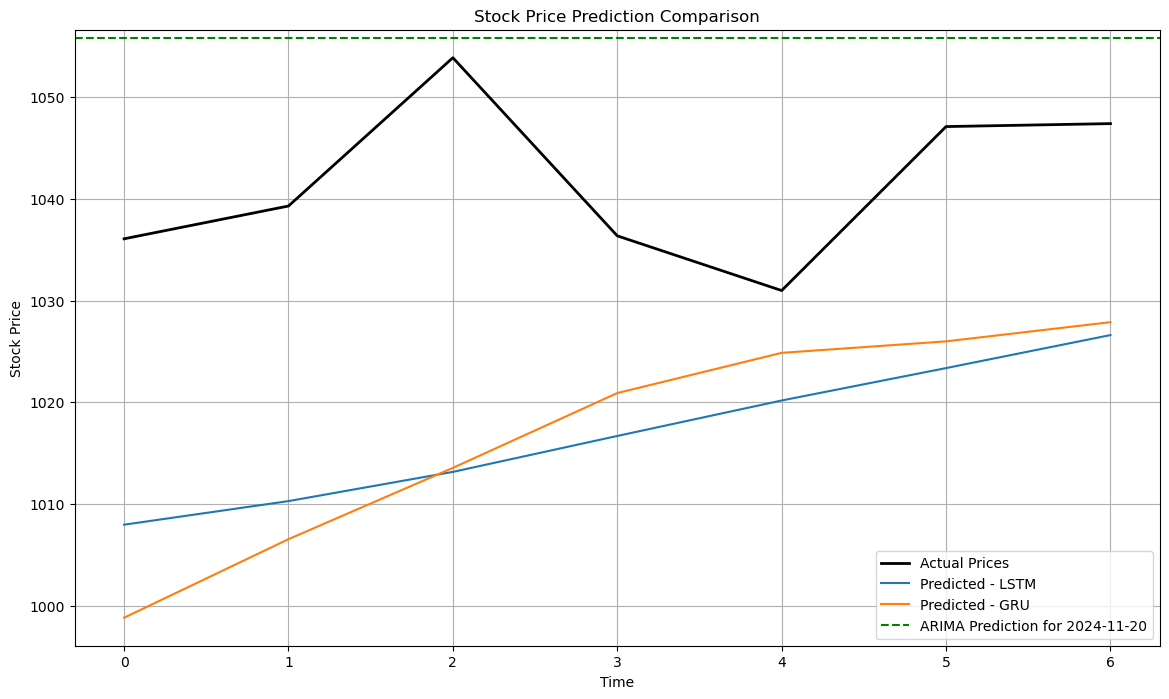

LSTM RMSE: 26.12, MAE: 24.66
LSTM Predicted Price for 2024-11-20: 1026.61
GRU RMSE: 27.19, MAE: 24.62
GRU Predicted Price for 2024-11-20: 1027.87
ARIMA Prediction for 2024-11-20: 1055.73

Trend Analysis: Downward


In [ ]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, GRU, Dense, Dropout
from tensorflow.keras.callbacks import ReduceLROnPlateau
from statsmodels.tsa.arima.model import ARIMA
from sklearn.linear_model import LinearRegression

# 1. Fetch Data from Yahoo Finance
def fetch_data_from_yfinance(ticker, start_date, end_date):
    print(f"Fetching data for {ticker} from {start_date} to {end_date}...")
    stock_data = yf.download(ticker, start=start_date, end=end_date, progress=False)
    stock_data.reset_index(inplace=True)
    return stock_data[["Date", "Close"]]

# 2. EDA
def eda(data):
    print("Basic Statistics:")
    print(data.describe())
    plt.figure(figsize=(12, 6))
    plt.plot(data['Date'], data['Close'], label='Close Price', color='blue')
    plt.title("Stock Price Over Time")
    plt.xlabel("Date")
    plt.ylabel("Stock Price")
    plt.legend()
    plt.grid()
    plt.show()

# 3. Preprocess Data
def preprocess_data(data, time_steps=30):
    scaler = MinMaxScaler(feature_range=(0, 1))
    scaled_data = scaler.fit_transform(data[['Close']])
    X, y = [], []
    for i in range(len(scaled_data) - time_steps):
        X.append(scaled_data[i:i+time_steps, 0])
        y.append(scaled_data[i+time_steps, 0])
    return np.array(X).reshape(-1, time_steps, 1), np.array(y), scaler

# 4. Build Models
def build_lstm(input_shape):
    model = Sequential([
        LSTM(100, return_sequences=True, input_shape=input_shape),
        Dropout(0.2),
        LSTM(50),
        Dense(1)
    ])
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

def build_gru(input_shape):
    model = Sequential([
        GRU(100, return_sequences=True, input_shape=input_shape),
        Dropout(0.2),
        GRU(50),
        Dense(1)
    ])
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

# 5. Train Models
def train_model(model, X_train, y_train, epochs=20, batch_size=16):
    lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, verbose=1)
    model.fit(
        X_train, y_train,
        validation_split=0.2,
        epochs=epochs,
        batch_size=batch_size,
        callbacks=[lr_scheduler],
        verbose=1
    )
    return model

# 6. ARIMA Model
def predict_arima(data, predict_date):
    recent_data = data[data['Date'] >= (data['Date'].max() - pd.DateOffset(months=2))]
    arima_model = ARIMA(recent_data['Close'], order=(5, 1, 0))
    arima_model_fit = arima_model.fit()
    forecast = arima_model_fit.forecast(steps=5)
    return forecast.iloc[-1]

# 7. Evaluate and Visualize
def evaluate_and_visualize(models, X_test, y_test, scaler, model_names, arima_prediction, arima_date, data):
    predictions = []
    rmses = []
    maes = []
    y_test_original = scaler.inverse_transform(y_test.reshape(-1, 1))

    predicted_prices = {}

    for model, name in zip(models, model_names):
        preds = model.predict(X_test)
        preds_original = scaler.inverse_transform(preds)
        predictions.append(preds_original)
        predicted_prices[name] = preds_original[-1, 0]
        rmse = np.sqrt(mean_squared_error(y_test_original, preds_original))
        mae = mean_absolute_error(y_test_original, preds_original)
        rmses.append(rmse)
        maes.append(mae)

    plt.figure(figsize=(14, 8))
    plt.plot(y_test_original, label='Actual Prices', color='black', linewidth=2)
    for preds, name in zip(predictions, model_names):
        plt.plot(preds, label=f'Predicted - {name}')
    plt.axhline(y=arima_prediction, color='green', linestyle='--', label=f'ARIMA Prediction for {arima_date}')
    plt.title("Stock Price Prediction Comparison")
    plt.xlabel("Time")
    plt.ylabel("Stock Price")
    plt.legend()
    plt.grid()
    plt.show()

    for name, rmse, mae in zip(model_names, rmses, maes):
        print(f"{name} RMSE: {rmse:.2f}, MAE: {mae:.2f}")
        print(f"{name} Predicted Price for {arima_date}: {predicted_prices[name]:.2f}")

    print(f"ARIMA Prediction for {arima_date}: {arima_prediction:.2f}")

# 8. Trend Analysis
def analyze_trend(data, n=5):
    if len(data) < n:
        raise ValueError(f"Not enough data to analyze trend. At least {n} data points are required.")

    recent_data = data.tail(n)
    x = np.arange(n).reshape(-1, 1)
    y = recent_data['Close'].values.reshape(-1, 1)

    model = LinearRegression()
    model.fit(x, y)
    slope = model.coef_[0][0]

    return "Upward" if slope > 0 else "Downward"

# 9. Main Execution
def main(ticker, predict_date):
    print(f"Fetching data for {ticker} from 2024-08-18 to 2024-11-18...")
    data = fetch_data_from_yfinance(ticker, start_date="2024-08-18", end_date="2024-11-18")
    eda(data)

    time_steps = 30
    X, y, scaler = preprocess_data(data, time_steps)

    train_size = int(len(X) * 0.8)
    if train_size == 0 or len(X) - train_size <= 0:
        raise ValueError("Not enough data points to create a valid training and testing set. Increase your data range.")

    X_train, X_test = X[:train_size], X[train_size:]
    y_train, y_test = y[:train_size], y[train_size:]

    lstm_model = build_lstm((time_steps, 1))
    gru_model = build_gru((time_steps, 1))

    print("\nTraining LSTM...")
    train_model(lstm_model, X_train, y_train, epochs=20, batch_size=16)

    print("\nTraining GRU...")
    train_model(gru_model, X_train, y_train, epochs=20, batch_size=16)

    arima_prediction = predict_arima(data, predict_date)

    models = [lstm_model, gru_model]
    model_names = ["LSTM", "GRU"]
    evaluate_and_visualize(models, X_test, y_test, scaler, model_names, arima_prediction, predict_date, data)

    trend = analyze_trend(data, n=5)
    print(f"\nTrend Analysis: {trend}")

# Run the main function
ticker = "BLK"  # BlackRock Inc.
predict_date = "2024-11-20"
main(ticker, predict_date)
